In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cfit

In [2]:
parteA = pd.read_csv('parteA.csv', delimiter="\t")

V = []
for i in range(1,12):
    if i != 9:
        V.append (parteA['V{}'.format(i)].dropna().to_numpy())

I = []
for i in range(1,12):
    if i != 9:
        I.append (parteA['I{}'.format(i)].dropna().to_numpy())

I[0],V[0]

(array([ 0.35 ,  1.05 ,  2.   , -0.3  , -0.9  , -2.425, -1.05 ,  2.7  ]),
 array([1.397 , 1.3938, 1.3869, 1.4008, 1.4047, 1.4146, 1.4054, 1.3829]))

In [3]:
def linear(x, m, b):
    return m*x + b

def quadratic(x, a, b, c):
    return a*x**2 + b*x + c

def r2(y, ymodel):
    yMean = np.mean(y)
    SSres = np.sum( (y - ymodel)**2 )
    SStot = np.sum( (y - yMean)**2 )
    return 1 - SSres/SStot

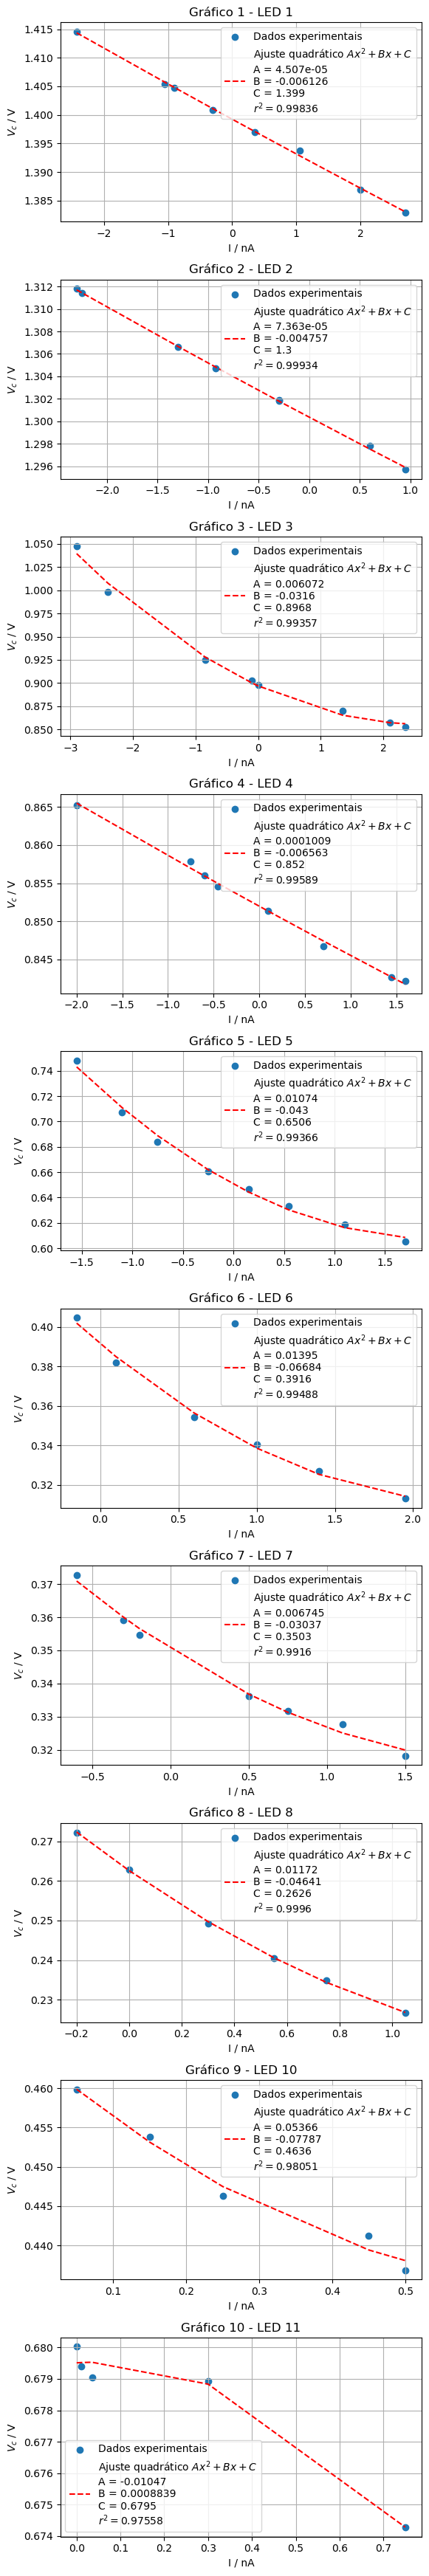

In [4]:
#parâmetros da regressão V(I), ordenada na origem é Vc 
Vc = []
uVc = []
Rs2 = []
fig, axs = plt.subplots(10,1, figsize =(6,35))

leds = [i for i in range(1,12) if i!=9]

for i in range(10):
    param_VI, coef_VI = cfit(quadratic, I[i], V[i])
    R2 = r2(V[i], quadratic(I[i], param_VI[0], param_VI[1],param_VI[2]))
    Vc.append(param_VI[2])
    uVc.append( np.sqrt(coef_VI[2,2]) *3)
    Rs2.append(R2)
    axs[i].set_title(f'Gráfico {i+1} - LED {leds[i]}')
    axs[i].scatter(I[i],V[i], label = 'Dados experimentais')
    axs[i].plot(np.sort(I[i]), param_VI[0]*np.sort(I[i])**2 + param_VI[1]*np.sort(I[i])+param_VI[2],
                color = "r", ls='--',
                label = f'Ajuste quadrático $A x^2 + B x + C$ \nA = {param_VI[0]:.4}\nB = {param_VI[1]:.4}\nC = {param_VI[2]:.4}\n$r^2 = {R2:.5}$')
    axs[i].grid()
    axs[i].legend()
    axs[i].set_xlabel('I / nA')
    axs[i].set_ylabel('$V_c$ / V')  

plt.legend()
plt.tight_layout()
plt.savefig('RegressãoLEDS')
plt.show()



In [5]:
print('Vc', 'uVc')
for i in range(10):
    print(Vc[i], uVc[i])

Vc uVc
1.3992388209128706 0.0007408932018984355
1.3003669759765377 0.00025500688944593336
0.8968245314890873 0.010879015570023269
0.8519825511428877 0.0008920515659408318
0.6505984498469474 0.007071695762110326
0.3915573683828102 0.006226370857774555
0.3502755511545095 0.0035537619847050297
0.2625758205162163 0.0007626808206768871
0.4636113214144332 0.008004085972789732
0.6795117978441019 0.000955334667851777


In [6]:
wl = np.array([
    376.6,
    408.2,
    455.3,
    466.2,
    520.9,
    590.7,
    611.3,
    648.8,
    567.9,
    512.7
]) #wv - wavelength

c = 299792458 #m s⁻1
mu = c/(wl*10**(-9)) #s⁻1
e = 1.602176634e-19 #C

Vc = np.array(Vc, float)

param, coef = cfit(linear, mu, Vc)
param, np.sqrt(coef[0,0])*3,np.sqrt(coef[1,1])*3

(array([ 3.55907939e-15, -1.40372828e+00]),
 np.float64(3.665842233800178e-16),
 np.float64(0.2224888647291545))

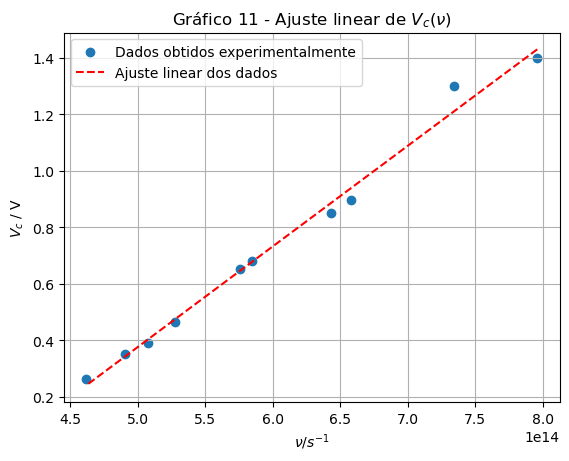

In [7]:
plt.scatter(mu, Vc, label = 'Dados obtidos experimentalmente')
plt.plot(mu[:-2], linear(mu[:-2], param[0],param[1]),
         ls = '--',
         color='r',
         label = 'Ajuste linear dos dados'
        )

plt.xlabel(r'$\nu / s^{-1}$')
plt.ylabel('$V_c$ / V')
plt.title(r'Gráfico 11 - Ajuste linear de $V_c (\nu)$')

plt.legend()
plt.grid()
plt.savefig('RegressaoFINAL')
plt.show()